In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import mode
%matplotlib inline

In [3]:
path1 = "/media/nishanth/E/bigdatathings/ML-DL/daysVsnight/days"
path2 = "/media/nishanth/E/bigdatathings/ML-DL/daysVsnight/night"

In [265]:
train_data = list()
labels = list()
for idx,p in enumerate([path1,path2]):
    for f in os.listdir(p):
        img = cv2.imread(p+"/"+f)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(200,200))
        train_data.append(img)
        labels.append(idx)

In [358]:
class Classifier(object):
    
    def __init__(self):
        self.method = ['L1','Histogram intersection']
                
    def train(self,x,y):
        self.X = x
        self.Y = y        
        
    def l1_distance(self, i1, i2):
        return np.sum(abs(i1-i2))
    
    def comp_hist(self, i1, i2):
        rgb_i1 = cv2.calcHist([i1], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
        norm_i1 = cv2.normalize(rgb_i1).flatten()
        rgb_i2 = cv2.calcHist([i2], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
        norm_i2 = cv2.normalize(rgb_i2).flatten()
        return cv2.compareHist(norm_i1, norm_i2,  cv2.cv.CV_COMP_CHISQR)
        
        
    def predict(self,img,meth=0, k=1):
        print "{0} is selected".format(self.method[meth])
        store = dict()
        for i in range(len(self.X)):
                if meth == 0:
                    d = self.l1_distance(img, self.X[i])
                else:
                    d = self.comp_hist(img,self.X[i])
                    
                store[d] = self.Y[i] 
              
        distances = store.keys()
        distances.sort()
        self.pred = mode([store[dist] for num,dist in enumerate(distances) if num < k])[0][0]
        
    def plot(self,img):
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        if self.pred == 0:
            plt.xlabel("pred: day")
        else:
            plt.xlabel("pred: night")
     

In [359]:
c = Classifier()
c.train(train_data,labels)

L1 is selected


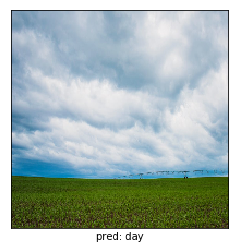

In [360]:
test_img = cv2.imread("/media/nishanth/E/bigdatathings/ML-DL/daysVsnight/test/pexels-photo-736859.jpeg")
test_img = cv2.resize(test_img,(200,200))
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
c.predict(test_img, meth=0, k=4)
c.plot(test_img)

Histogram intersection is selected


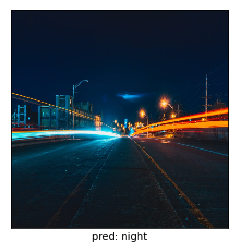

In [363]:
test_img = cv2.imread("/media/nishanth/E/bigdatathings/ML-DL/daysVsnight/test/pexels-photo-379419.jpeg")
test_img = cv2.resize(test_img,(200,200))
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
c.predict(test_img, meth=1, k=4)
c.plot(test_img)